<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase9_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 9 (Viernes 11 de abril, 2025)
---

## Matrices definidas positivas

Una matriz simétrica $S$ $m\times m$ se dice **definida positiva**, y escribimos $S\succ 0$, si la forma cuadrática (polinomio de grado $2$)
$$
x^TSx>0\qquad\mbox{para todo }x\in\mathbb{R}^m\setminus\{0\}.
$$

## 🧮 Ejemplos de Matrices Definidas Positividas


#### Ejemplo 1
$$
S = \begin{bmatrix} 2 & 0 \\ 0 & 6 \end{bmatrix} \quad  \text{es definida positiva}
$$
<details> <summary>Por qué?</summary> Basta calcular la forma cuadrática asociada:
$$\begin{bmatrix} x_1 & x_2 \end{bmatrix}
\begin{bmatrix} 2 & 0 \\ 0 & 6 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}=2x_1^2+6x_2^2,
$$
la cual es positva siempre que $x_1$ y $x_2$ no sean ambos ceros.


</details>

---

#### Ejemplo 2
$$
S = Q^\top \begin{bmatrix} 2 & 0 \\ 0 & 6 \end{bmatrix}  Q, \quad \text{con $Q$ ortogonal}
$$
es definida positiva. (Observar que en este caso los valores propios son los mismos que en el ejemplo anterior.)

**Ejercicio:** probarlo.

---

#### Ejemplo 3
$$
S = C^\top \begin{bmatrix} 2 & 0 \\ 0 & 6 \end{bmatrix} C,\qquad \mbox{con $C$ invertible}.
$$
**Ejercicio:** probarlo.
Observar que en este caso los valores propios cambiaron.

---

#### Ejemplo 4
$$
S = \begin{bmatrix} a & b \\ b & c \end{bmatrix} \text{ es definida positiva si } a > 0 \text{ y } ac - b^2 > 0
$$

**Ejercicio:** probarlo.
Observar que en este caso los valores propios cambiaron.
<details> <summary>Sugerencia:</summary>
Escribir la forma cuadrática asociada, y hacer cuentas.

</details>

---





In [15]:
using LinearAlgebra
using Plots

Valores propios de A: [2.0, 60.0]


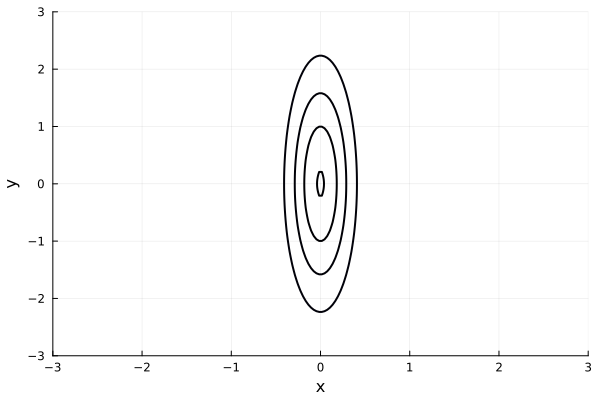

In [9]:
# Definimos la matriz simétrica
#A = [3 2; 2 1]
A=[2 0; 0 60]
# Calculamos los valores propios
eigvals_A = eigvals(A)
println("Valores propios de A: ", eigvals_A)

# Definimos la forma cuadrática q(x, y)
q(x, y) = [x, y]' * A * [x, y]

# Graficamos curvas de nivel
xs = ys = range(-3, 3, length=200)

Z = [q(x, y) for x in xs, y in ys]

# Graficamos curvas de nivel
xs = ys = range(-3, 3, length=200)

Z = [q(x, y) for x in xs, y in ys];
contour(xs, ys, Z,
    levels = [-10, -5, -2, 0.1, 2, 5, 10],
    xlabel = "x", ylabel = "y",
    #title = L"q(x, y) = 2x^2 + 60y^2",
    fill = false,
    linewidth = 2,
    legend = false)


Veamos que si $A$ es una matriz simétrica con valores propios no todos positivos, las curvas de nivel cambian radicalemnte.

In [13]:
#A=[3 2; 2 1]
A=[-1 0; 0 1]
eigvals(A)

2-element Vector{Float64}:
 -1.0
  1.0

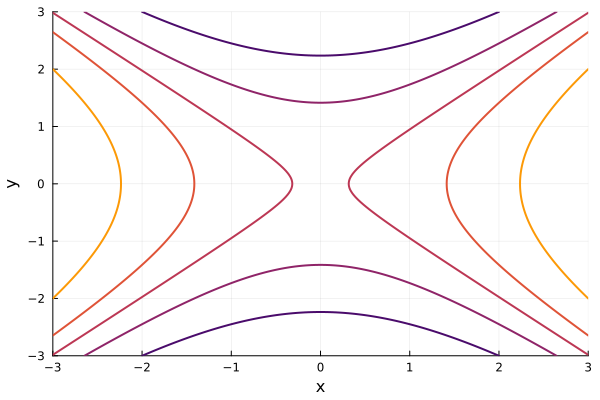

In [14]:


# Definimos la forma cuadrática q(x, y)
q(x, y) = [x, y]' * A * [x, y]

# Graficamos curvas de nivel
xs = ys = range(-3, 3, length=200)

Z = [q(x, y) for x in xs, y in ys];
contour(xs, ys, Z,
    levels = [-10, -5, -2, 0.1, 2, 5, 10],
    xlabel = "x", ylabel = "y",
    #title = L"q(x, y) = 3x^2 + 4xy + y^2",
    fill = false,
    linewidth = 2,
    legend = false)

## 🧪 Tests de Positividad para Matrices Simétricas

Sea $S \in \mathbb{R}^{n \times n}$ una matriz **simétrica** ($S^\top = S$). Los siguientes tests son equivalentes para verificar que $S$ es **definida positiva**:

---

### ✅ Test 1: Autovalores positivos

> $S$ es definida positiva si **todos sus autovalores $\lambda_i$ son positivos**.

Esto equivale a:
$$
S \text{ definida positiva} \iff \lambda_i > 0 \text{ para todo } i.
$$

**Ejercicio:** Probar la equivalencia.
<details><summary> Sugerencia</summary>
Ida: si $\lambda$ es valor propio de $S$, calcular la forma cuadrática sobre el vector propio asociado.
Vuelta: Usar el Teorema Espectral, y un $x$ genérico escribirlo en la base de vectores propios. (Es decir, que si $Q$ es base ortonormal de vectores propios, entonces $y=Q^Tx$ son los coeficientes  del vector $x$ en base de vectores propios.

</details>

---

### ✅ Test 2: Factorización $S = A^\top A$ con $A$ de columnas independientes

> $S$ es definida positiva si existe $A$ con columnas linealmente independientes tal que:
$$
S = A^\top A.
$$

**Ejercicio:** Probar la equivalencia.


---

### ✅ Test 3: Determinantes principales positivos

> $S$ es definida positiva si es simétrica y  **todos los determinantes principales** son positivos:
$$
D_k := \det(S_{k \times k}) > 0 \quad \text{para } k = 1, \dots, n.
$$

Observar primero que toda matriz definida positiva tiene determinante positivo. Esto resulta de que el producto de valores propios es positivo.

Donde $S_{k \times k}$ es la submatriz superior izquierda de orden $k$.

Si $S$ es definida positva, $S_{k \times k}$ también lo es. Por ejemplo $S_{1 \times 1}=e_1^TSe_1>0$.

Análogamente, si nos restringimos la forma cuadrática a vectores de la forma $x=x_1 e_1+x_2e_2$, entonces vemos que que
$$
0< x^TSx=[x_1,x_2]S_{2\times 2}\begin{pmatrix} x_1\\x_2\end{pmatrix}\
$$
Luego tenemos que $S_{2\times 2}$ es definida positiva y por lo tanto $D_{2\times 2}\succ 0$. Procediendo de igual manera tenemos los otros determinantes principales.

---

